# FACE MASK DETECTION USING K-NEAREST NEIGHBORS


Face Mask Images dataset is used. It has 10,000 images [5000 WithMask, 5000 WithoutMask].

Dataset used for this project : [Face Mask Detection Dataset](https://www.kaggle.com/ashishjangra27/face-mask-12k-images-dataset)

- Images of WithMask are given the label of 1

- Images of WithoutMask are given the label of 0

After training the model with K-Nearest Neighbors Algorithm, The Model is Able to validate if a person is  wearing a Mask or Not.

In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import cv2
import numpy as np
import matplotlib.pyplot as plt

import data_preprocessing as preprocessor

import pickle
%matplotlib inline

**DIRECTORY** has the path of training dataset

**TEST_DIRECTORY** has the path of test dataset

**CATEGORIES ARRAY** CONTAINS THE LABELS FOR OUR DATASET

In [2]:
DIRECTORY = "/ML/Face Mask Detection/dataset/"
TEST_DIRECTORY = "/ML/Face Mask Detection/test_data/"
VALIDATION_DIRECTORY = "/ML/Face Mask Detection/Validation/"

CATEGORIES = ['WithoutMask', 'WithMask']

**DATA PREPROCESSING**

*data_preprocessing.py* has functions to normalize the data.

1. create_dataset(CATEGORIES, DIRECTORY)

- Takes **CATEGORIES** ARRAY AND DIRECTORY OF **DATASET**
- It read images, convert to grayscale and resize the image to ***64x64*** so that it takes less processing power.
- Then saves the ***64x64*** data to array **X** and save its label to array **y**.
- Returns Data **X** and  Label **y** Lists.
2. reshape_to_np_array(X, y)

- Takes Data **X** and Label **y** Lists.
- Convert python lists to Numpy Arrays.
- Reshape the Numpy Arrays to 1-dimension so reshaping it **MxN** [ WHERE : M = No. of samples AND N = 64*64 = 4096]
- Returns Data **X** and  Label **y** Numpy Arrays.
3. normalize_data(X)

- Takes Data **X** Numpy Array.
- Dividing **X** Numpy Array with Max Value of **X**.
- It's a Min-Max Approach so that: Max Value becomes **1**, Min Value becomes **0**, and Values in between will be in range of **0-1**.
- Returns Data **X** Numpy Array.
4. saving_data(X, y, x_path, y_path)
- Takes Data **X**, Labels **y**, path for saving Data **X**, path for saving Labels **y**
- Save **Data** and **Labels** to local path.

In [3]:
# Working on normalizing training dataset
X_train, y_train = preprocessor.create_dataset(CATEGORIES, DIRECTORY)
X_train, y_train = preprocessor.reshape_to_np_array(X_train, y_train)
X_train = preprocessor.normalize_data(X_train)

# Working on normalizing test dataset
X_test, y_test = preprocessor.create_dataset(CATEGORIES, TEST_DIRECTORY)
X_test, y_test = preprocessor.reshape_to_np_array(X_test, y_test)
X_test = preprocessor.normalize_data(X_test)

# Working on normalizing validation dataset
X_val, y_val = preprocessor.create_dataset(CATEGORIES, VALIDATION_DIRECTORY)
X_val, y_val = preprocessor.reshape_to_np_array(X_val, y_val)
X_val = preprocessor.normalize_data(X_val)

***Important Annotations***

**X_train** = Training data

**y_train** = Training labels

**X_test** = Test data

**y_test** = Test labels

**X_val** = Validation data

**y_val** = Validation labels

**SHOWING IMAGE WITH ITS RESPECTIVE LABEL**
- Reshaping it back to **64x64** so that you can see the image plotting.
- Using Matplotlib to plot the images.
- As you can see in below cell's output, Both image now cantains their respective labels

In [5]:
reshape_X = []
reshape_X = np.array(reshape_X)
reshape_X = X_train.reshape(-1, 64, 64)

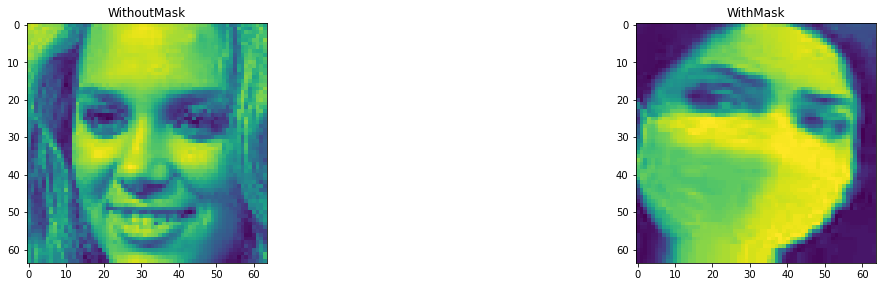

In [6]:
plt.figure(figsize=(20,15))
columns = 2

for i in range(columns):
    plt.subplot(int(5 / columns + 1), columns, i + 1)
    plt.imshow(reshape_X[2960*(i+1)])
    plt.title(CATEGORIES[y_train[2960*(i+1)]])

**FITTING TRAINING DATA USING KNN-CLASSIFICATION**

THREE PARAMETERS ARE CHANGED TO TRAIN THE MODEL.

- **metric** => distance metric is set to *manhattan*, as the default parameter (****minkowski***) and *euclidean* are effecting the accuracy.
- **n_neighbors** => n_neighbors is the most important parameter in effecting the accuracy. N=2 is increasing the accuracy.
- **weights** => default(***uniform***) weight is not effecting much on the accuracy. By changing to *distance* accuracy increases.

In [7]:
#KNN MODEL INITIALIZATION
KNN_Model = KNeighborsClassifier(metric='manhattan', n_neighbors=2, weights='distance')

KNN_Model.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=2, weights='distance')

**EVALUATING MODEL**

Evaluating model's accuracy on Test and Validation data.

In [8]:
# Evaluation of model on Test and Validation data

# prediction on test data
y_test_pred = KNN_Model.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)

print("Accuracy on Test data: ", accuracy*100)

# prediction on test data
y_val_pred = KNN_Model.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)

print("Accuracy on Validation data: ", accuracy*100)

Accuracy on Test data:  89.14572864321609
Accuracy on Validation data:  87.5


**SHOW TEST IMAGES WITH PREDICTED LABELS**

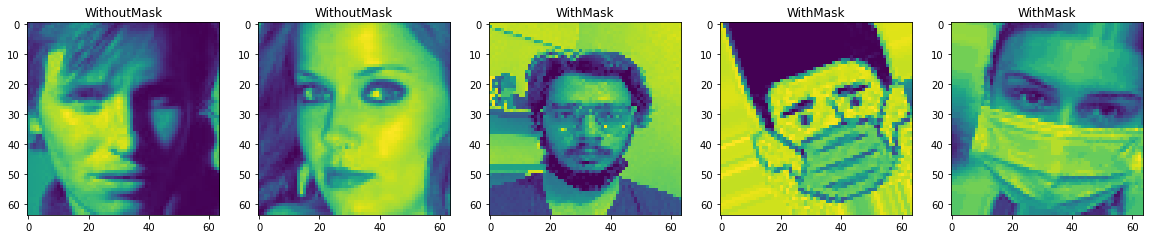

In [9]:
# printing 5 predicted images from test data
reshape_X = np.array(reshape_X)
reshape_X = X_test.reshape(-1, 64, 64)

plt.figure(figsize=(20,15))
columns = 5
for i in range(columns):
    plt.subplot(int(5 / columns + 1), columns, i + 1)
    plt.title(CATEGORIES[y_test_pred[(i+1)*170]])
    plt.imshow(reshape_X[(i+1)*170])

**PLOTTING CONFUSION MATRIX OF OUR MODEL ON TEST DATASET**

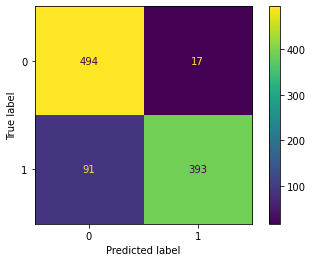

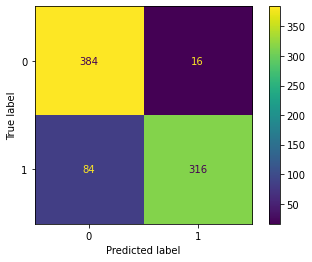

In [10]:
confusion_matrix_test = plot_confusion_matrix(KNN_Model, X_test, y_test)

confusion_matrix_validation = plot_confusion_matrix(KNN_Model, X_val, y_val)